# Exercise Sheet 6

Homework by: Jakob Kreft and Lukas Matt

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.sparse
from sklearn.linear_model import Ridge, Lasso, LinearRegression

## 1 Regularization and Bias

$$ y = \beta_0 + \beta^T x + \epsilon = \tilde\beta^T\tilde x + \epsilon $$

Consider a regression problem with two explanatory variables $x_1, x_2$, i.e. $\beta = (\beta_0 , \beta_1 , \beta_2 )^T$ and $x = (1, x_0 , x_1 )^T$.

### (a)
In this setting, write down the loss function for ridge regression, penalizing the L2 -norm of $β$, in
components. What is the influence of the regression strength on the bias $β_0$?

$$ y = (y_1, y_2, y_3) \in \mathbb{R}^3 $$

$$ \mathrm{Loss} = \| y - \beta^T x \|^2 + \lambda \| \beta \|^2 $$

$$ =  (y - \beta^T X)^T (y - \beta^T X) + \lambda  \beta^T \beta $$

$$ (y_i - \beta_0 \cdot 1 + \beta_1 x_0 + \beta_2 x_1)^T (y_i - \beta_0 \cdot 1 + \beta_1 x_0 + \beta_2 x_1) $$

$$ (y $$

### (b)
Oftentimes, a regularization of the bias term is unwanted. How would you modify the loss function to
account for this?

### (c)
Which shapes in $\mathbb{R}^3$ do the regularization contours (i.e. sets of parameters with equal regularization
penalty) of versions (a) and (b) have?

## 2 Estimating Parameter Relevance

In [4]:
# load the data
with open('data/vostok.txt', 'r') as f:
    lines = f.readlines()
    
# remove header and split lines
lines = [l.split() for l in lines[2:]]

# filter out lines with missing data
lines = [l for l in lines if len(l) == 4]

# convert to float
lines = np.array(lines).astype(np.float32)
print(f'{lines.shape=}')

features = np.concatenate([lines[:, :1], lines[:, 2:]], axis=1).T
feature_names = 'age', 'CO₂', 'dust'
labels = lines[:, 1]
label_name = '∆T'

print(f'{features.shape=}, {labels.shape=}')

lines.shape=(3729, 4)
features.shape=(3, 3729), labels.shape=(3729,)


In [5]:
from sklearn.linear_model import LinearRegression

# TODO: fit the linear regressor and compute the sum of square deviations

def get_linreg_ssd(X, Y):
    
    regressor = LinearRegression()
    regressor.fit(X.T, Y)

    pred_Y = regressor.predict(X.T)

    ssd = np.sum((pred_Y - Y)**2)
    return ssd

In [6]:
original = get_linreg_ssd(features, labels)
print('sum of squared deviations:', original)

sum of squared deviations: 6362.9375


In [7]:
# TODO: for each feature, randomly permute it amongst the samples, 
#       refit the regressor and compte sum of squared deviations

rng = np.random.default_rng()
ssds = []

for p, row in enumerate(features):
    
    perm_features = features.copy()
    
    perm_features[p] = rng.permutation(row)
    
    ssds.append(get_linreg_ssd(perm_features, labels))

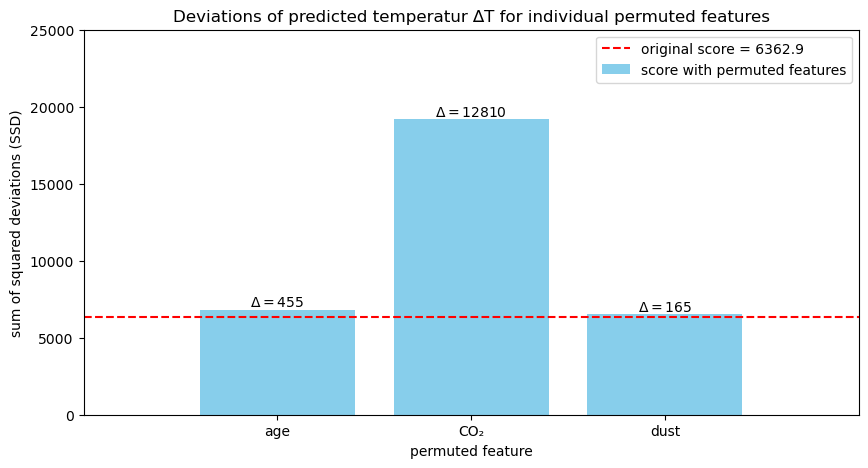

In [8]:
plt.figure(figsize=(10,5))
plt.title('Deviations of predicted temperatur ∆T for individual permuted features')
bar = plt.bar([0,1,2], ssds, color='skyblue', label='score with permuted features')
plt.plot([-1,3], np.ones(2)*original, 'r--', label=r'original score = '+str(round(original, 1)))
for rect in bar:
    delta = rect.get_height() - original
    plt.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'$\Delta={delta:.0f}$', ha='center', va='bottom')

plt.xticks([0,1,2], feature_names)
plt.xlabel('permuted feature')
plt.xlim(-1, 3)
plt.ylabel('sum of squared deviations (SSD)')
plt.ylim(0, 25000)
plt.legend()
plt.show()

The resulting sum of squared deviation scores are plotted as a bar chart. The red line marks the original ssd score.

The deviation is strongest for the permuted CO₂ feature, which suggests that it has the highest relevance for predicting the temperature ∆T.

The score is slightly increased for the age feature, and there is almost no difference for the dust feature, which therefore appears to be the least relevant.

## 4 Visualize Regularization Contours

In [9]:
# load the data
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']
print(f'{x.shape} {y.shape}')

(2, 100) (1, 100)


In [10]:
# TODO: create a grid of points in the parameter space
beta_i = np.linspace(-1, 3, 500)
betagrid = np.array(np.meshgrid(beta_i, beta_i))

### (a)
Plot the Ridge regression regularization term as well as the Lasso regularization term for $\beta_1 , \beta_2 \in [−1, 3]$.

Ridge regression uses L_2 as regularization term: $\| \beta \|_2^2$

Lasso regression used L_1 as regularization term: $\| \beta \|_1$

In [11]:
def ridge_regterm(b1, b2):
    return b1**2 + b2**2

def lasso_regterm(b1, b2):
    return np.abs(b1) + np.abs(b2)

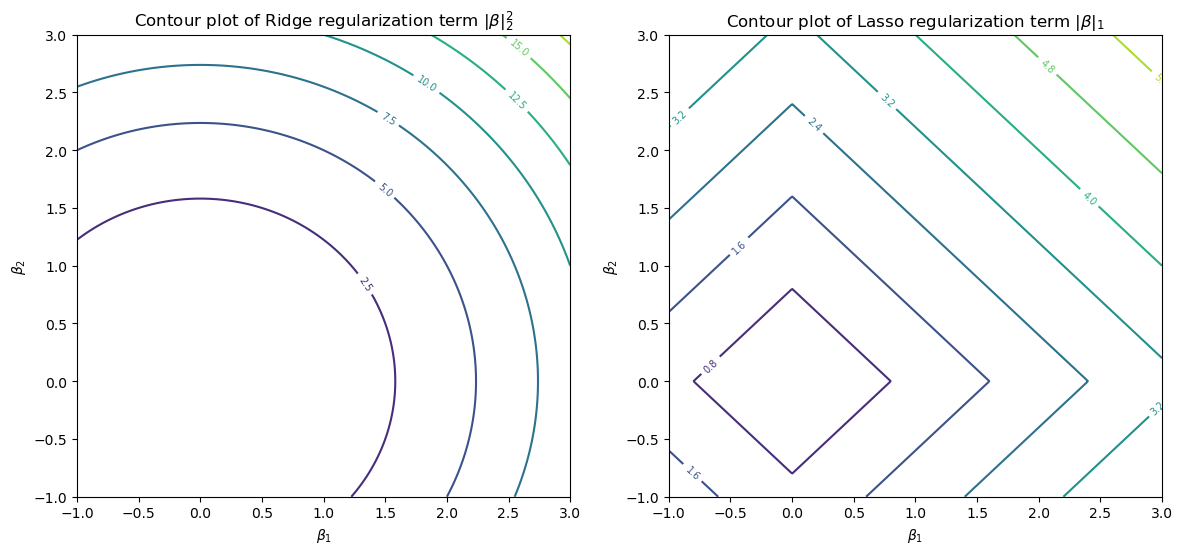

In [12]:
# TODO: make coutour plots for ridge and lasso regularization terms
fig, ax = plt.subplots(1,2, figsize=(14,6))
beta0, beta1 = betagrid

ax[0].set_title(r'Contour plot of Ridge regularization term $\| \beta \|_2^2$')
ridge = ax[0].contour(beta0, beta1, ridge_regterm(beta0, beta1))
ax[0].clabel(ridge, inline=True, fontsize=7)
ax[0].set_xlabel(r'$\beta_1$')
ax[0].set_ylabel(r'$\beta_2$')

ax[1].set_title(r'Contour plot of Lasso regularization term $\| \beta \|_1$')
lasso = ax[1].contour(beta0, beta1, lasso_regterm(beta0, beta1))
ax[1].clabel(lasso, inline=True, fontsize=7)
ax[1].set_xlabel(r'$\beta_1$')
ax[1].set_ylabel(r'$\beta_2$')
plt.show()

### (b)
For the data set linreg.npz plot the sum of squares (SSQ) of a linear regression as a function of $\beta$
over the same range as in (a), i.e. over the grid $[−1, 3] \times [−1, 3]$.

In [13]:
print(x.shape)
print(y.shape)

(2, 100)
(1, 100)


In [17]:
# TODO: for each combination of parameters, compute the sum of squared deviations.
#       do not use loops, but numpy broadcasting!
# TODO: make a coutour plot for sum of squared deviations

# intuitive solution using one loop:
lypred = np.array([beta0 * x[0][n] +  beta1 * x[1][n] for n in range(x.shape[1])])
lssq = np.sum((lypred - np.expand_dims(y.T, axis=1))**2, axis=0)
# we used this to verify the implementation below

In [18]:
# We use the dot product to compute \beta^T X
# To match shapes, we need to transpose. Remember this for later
print(f'{betagrid.shape = }')
ypred = np.dot(np.array(betagrid).T, x)
print(ypred.shape)

betagrid.shape = (2, 500, 500)
(500, 500, 100)


In [19]:
# just to visualize that broadcasting works out here
(ypred - y).shape

(500, 500, 100)

In [20]:
# calculate sum of squared errors
ssq = np.sum((ypred - y)**2, axis=2).T

In [21]:
# We run the linear regression and return the optimal parameters to see if our plot makes sense
beta = LinearRegression().fit(x.T, y.T).coef_[0]

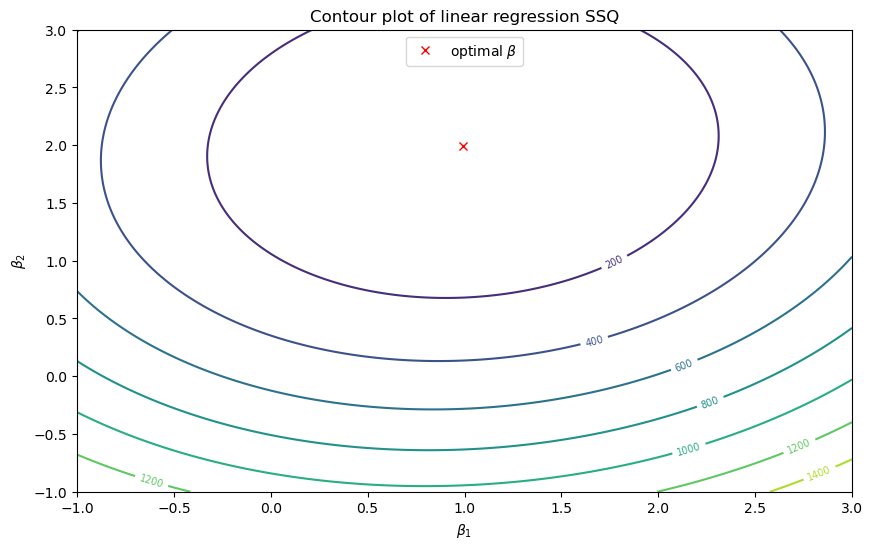

In [22]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_title(r'Contour plot of linear regression SSQ')
ridge = ax.contour(beta0, beta1, ssq)
ax.clabel(ridge, inline=True, fontsize=7)
plt.plot(*beta, 'r x', label=r'optimal $\beta$')
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel(r'$\beta_2$')
plt.legend(loc='upper center')
plt.show()

In [23]:
for i, b in enumerate(beta):
    print('beta'+str(i), b)

beta0 0.9912379503154678
beta1 1.9922619503237609


We mark the position of the optimal parameter set $\beta$ obtained by linear regression (red x). It agrees well with the plotted contours

### (c)
Plot the ridge and Lasso loss functions, i.e. $\mathrm{SSQ}(\beta) + \lambda \|β\|_2^2$ and $\mathrm{SSQ}(\beta) + \lambda \|β\|_1$, for $\lambda \in {0, 10, 50, 100, 200, 300}$ in the same $\beta$ grid as before and discuss your observations!

In [24]:
# TODO: for each lambda, plot both ridge regression and lasso loss functions
lambdas = [0, 10, 50, 100, 200, 300]



## 5 CT Reconstruction

set up design matrix (run this once to save to disk)

One application of linear regression is the reconstruction of CT-Scans. In this task, you will do this on simulated data in the 2D case. You are given a sinogram $Y \in \mathbb{R}^{ar}$ , a matrix where each row corresponds to a (1D) projection of the image consisting of $r$ detector readouts along one of a distinct, evenly spaced angles. Additionally, you are given the design matrix $X \in \mathbb{R}^{p\times ar}$. Excluding noise, one has $Y = IX$, with the image $I \in \mathbb{R}^{p}$ which should be reconstructed.

Some facts/descriptions for our understanding:

Each 1D projection consists $r$ detector pixel readouts, and there are $a$ different, evenly-spaced projection angles.

Rows of the sinogram $Y \in \mathbb{R}^{ar}$ are projections. Columns are the readout value of one pixel over all the angles.

### (a)
What is the interpretation of a column of $X$? Visualize a choice of four columns as images.

In [25]:
design_matrix = np.load('data/design_matrix.npy')
sino = np.load('data/sino.npy')

print(f'{design_matrix.shape=}')
print(f'{sino.shape=}')

design_matrix.shape=(11583, 2100)
sino.shape=(1, 2100)


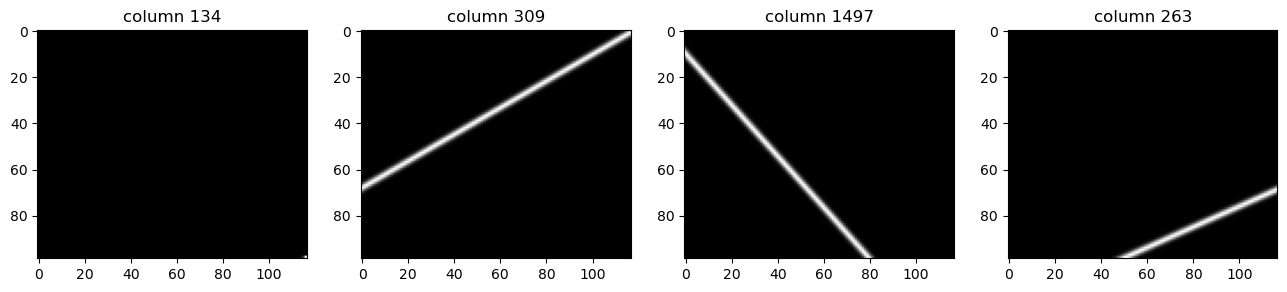

In [26]:
# TODO: visualize four random columns as images, using an image shape of (99, 117)
img_shape = (99, 117)

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in zip(np.random.choice(np.arange(design_matrix.shape[1]), 4), axs):
    ax.imshow(design_matrix[:, i].reshape(*img_shape), cmap='gray');
    ax.set_title(f'column {i}')

For the design matrix $X \in \mathbb{R}^{p\times ar}$:

The rows are the $99 \times 117 = 11583$ pixels of the resulting image.

The **columns** correspond to the individual x-rays pasing through the object at different angles and different detector positions: <br> $70$ parallel detector readouts $\times$ $30$ angles $= 2100$ rays.

The matrix describes how much each x-ray intersects with each of the pixels.

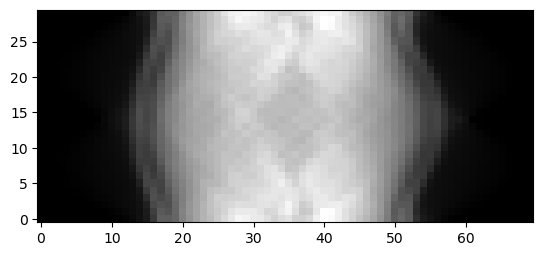

In [51]:
# visualize sinogram as image
n_parallel_rays = 70
n_angles = 30
plt.imshow(sino.reshape(n_angles, n_parallel_rays), origin='lower', cmap='gray')
plt.show();

### (b)
Solve the reconstruction problem with linear regression without any regularization and with ridge regression. What do you observe?

The reconstruction problem is given by:
$$ Y = \beta^T X $$

Where $Y$ is the sinogram, $\beta$ is the wanted array of pixels (the image) and $X$ is the design matrix.

In [55]:
# TODO: solve the reconstruction with linear regression and visualize the result
linreg = LinearRegression(copy_X=True)
linreg.fit(sino.T, design_matrix.T)

# TODO: solve the reconstruction with ridge regression and visualize the result
ridreg = Ridge(copy_X=True)
ridreg.fit(sino.T, design_matrix.T)

Ridge()

lin_img.shape = (99, 117)


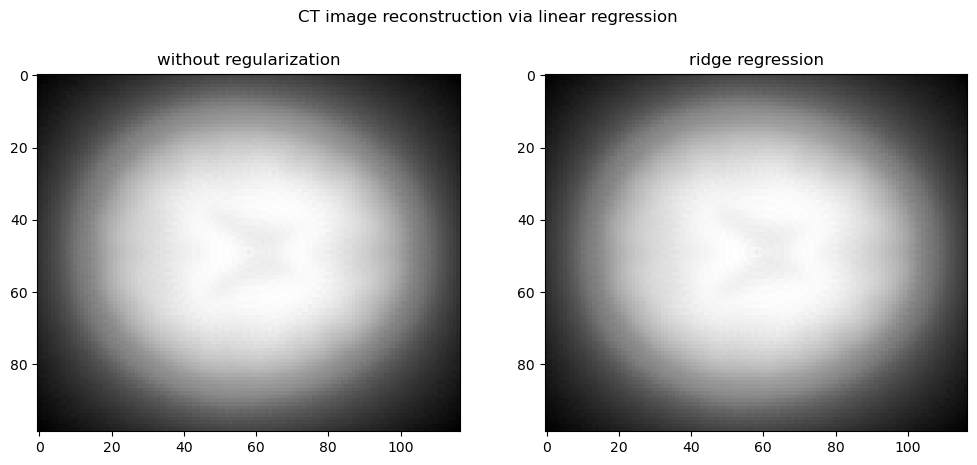

In [56]:
lin_img = linreg.coef_.reshape(img_shape)
rid_img = ridreg.coef_.reshape(img_shape)

print(f'{lin_img.shape = }')

plt.subplots(1,2, figsize=(12,5))
plt.suptitle('CT image reconstruction via linear regression')

vmin, vmax = min(lin_img.min(), rid_img.min()), max(lin_img.max(), rid_img.max())
plt.subplot(1,2,1)
plt.title('without regularization')
plt.imshow(lin_img, cmap='gray', vmin=vmin, vmax=vmax)
plt.subplot(1,2,2)
plt.title('ridge regression')
plt.imshow(rid_img, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

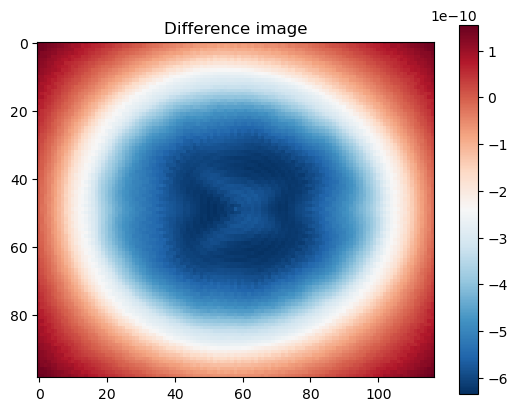

In [64]:
plt.title('Difference image')
plt.imshow(rid_img - lin_img, cmap='RdBu_r')
plt.colorbar()
plt.show()

The image reconstructed with ridge regression (regularization) appears clearer / more contrasted.

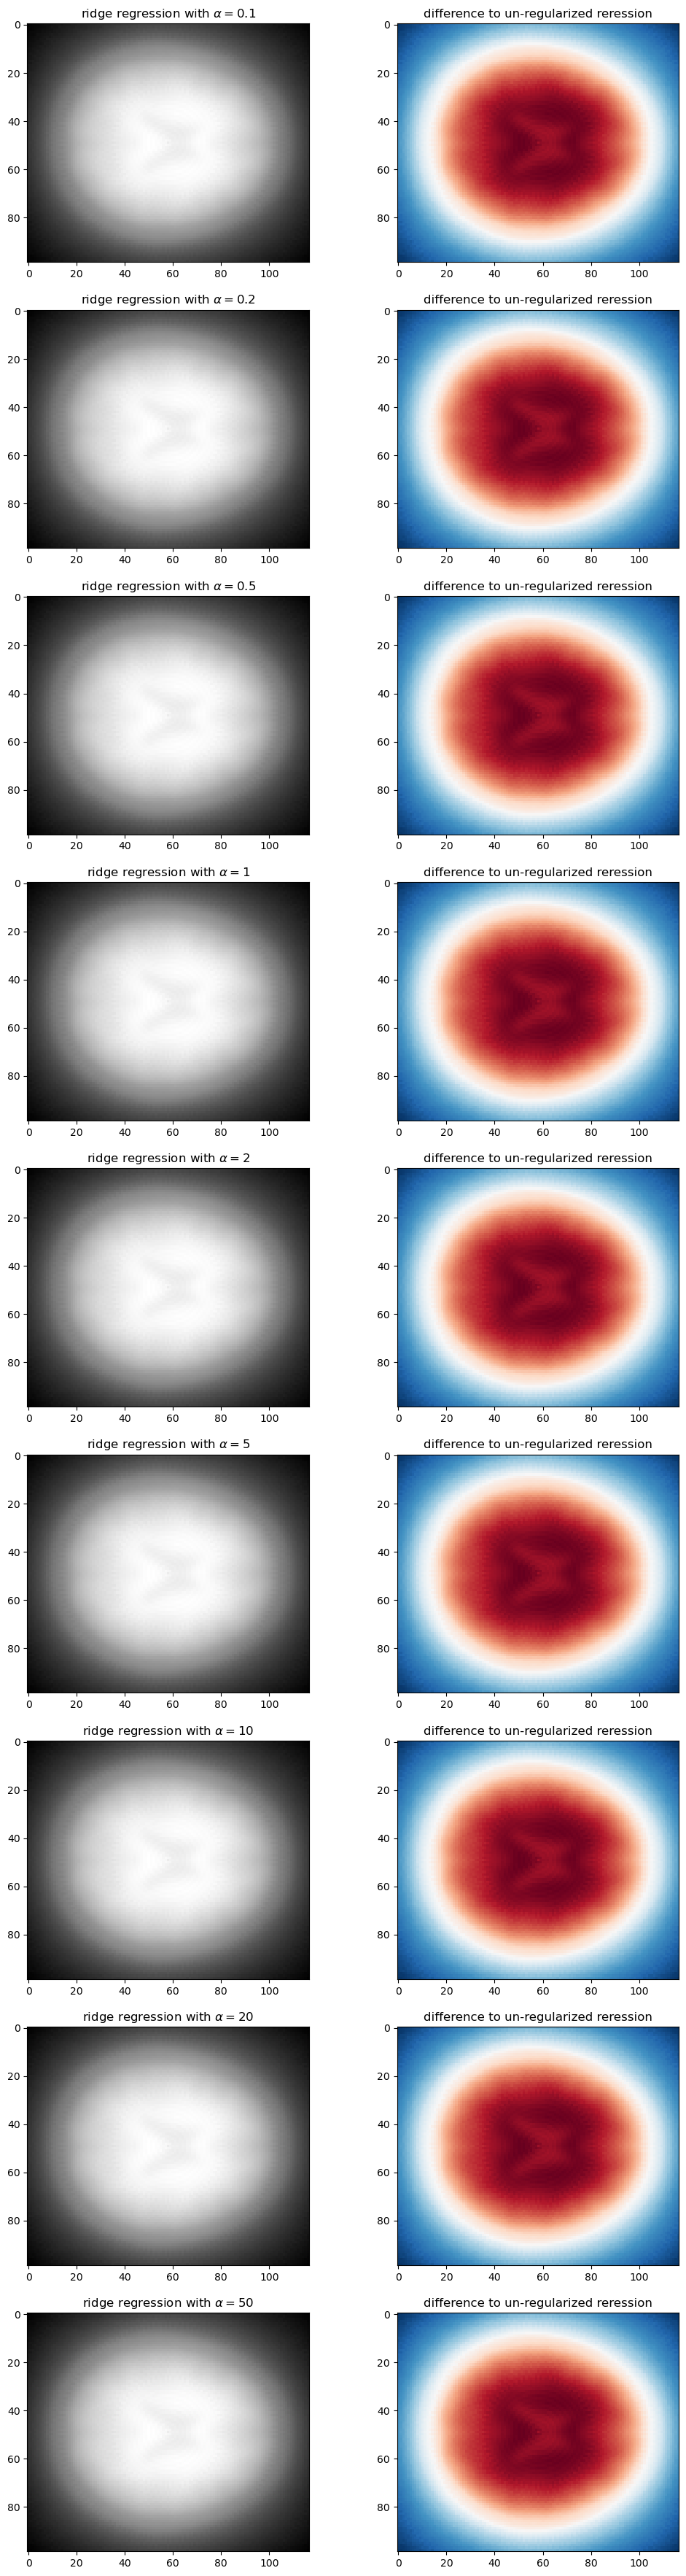

In [65]:
# Optional: try out different regularization strengths and oberve the influence
alphas = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]

plt.subplots(len(alphas), 2, figsize=(12,5*len(alphas)))

for i,a in enumerate(alphas):
    ridreg = Ridge(copy_X=True, alpha=a)
    ridreg.fit(sino.T, design_matrix.T)
    rid_img = ridreg.coef_.reshape(img_shape)
    diff_img = lin_img - rid_img

    vmin, vmax = min(lin_img.min(), rid_img.min()), max(lin_img.max(), rid_img.max())
    plt.subplot(len(alphas), 2, i*2+1)
    plt.title(r'ridge regression with $\alpha = '+str(round(a,1))+'$')
    plt.imshow(rid_img, cmap='gray', vmin=vmin, vmax=vmax)
    plt.subplot(len(alphas), 2, i*2+2)
    plt.title('difference to un-regularized reression')
    plt.imshow(diff_img, cmap='RdBu_r')#, vmin=vmin*1E-5, vmax=vmax*1E-5)
    
plt.show()